# Turning tabular data into geospatial


In [1]:
import pandas as pd

In [2]:
tdf = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data_20240618.csv', nrows = 10000)

In [3]:
len(tdf)

10000

In [4]:
tdf.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


In [5]:
from collections import Counter

In [6]:
Counter(tdf.status).most_common()

[('Alive', 9391), ('Stump', 338), ('Dead', 271)]

In [7]:
Counter(tdf.health).most_common()

[('Good', 6918), ('Fair', 1936), (nan, 609), ('Poor', 537)]

In [8]:
from shapely.geometry import Point

In [9]:
import geopandas as gpd

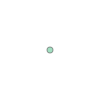

In [10]:
geometry = [Point(xy) for xy in zip(tdf['longitude'], tdf['latitude'])]
geometry[0]

In [11]:
gdf = gpd.GeoDataFrame(tdf, geometry = geometry)[['tree_id', 'stump_diam', 'status', 'health', 'geometry']]


In [12]:
gdf.crs = 4326

In [13]:
gdf.head()

,tree_id,stump_diam,status,health,geometry
0,180683,0,Alive,Fair,POINT (-73.84422 40.72309)
1,200540,0,Alive,Fair,POINT (-73.81868 40.79411)
2,204026,0,Alive,Good,POINT (-73.93661 40.71758)
3,204337,0,Alive,Good,POINT (-73.93446 40.71354)
4,189565,0,Alive,Good,POINT (-73.97598 40.66678)


(np.float64(-74.2791066075),
 np.float64(-73.68647660250001),
 np.float64(40.4790767395),
 np.float64(40.926552350499996))

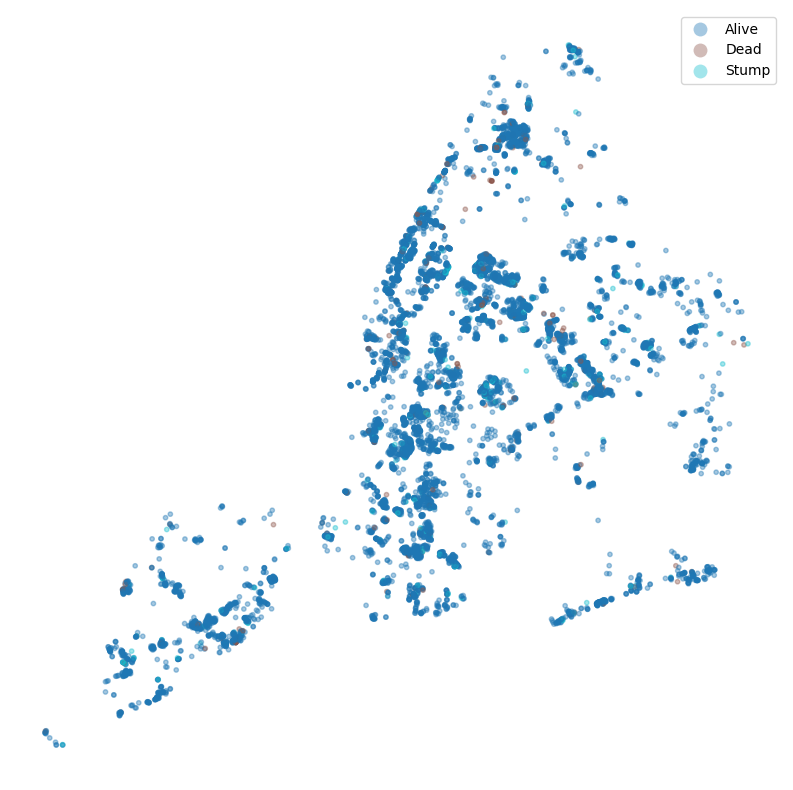

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1,figsize=(10,10))

gdf.plot(ax=ax, column = 'status', legend = True, markersize = 10, alpha = 0.4)
ax.axis('off')